In [2]:
using Plots
import Pkg; Pkg.add("Graphs")
using Random
using Graphs
using LinearAlgebra

   Resolving package versions...
    Updating `C:\Users\Gustavo\.julia\environments\v1.11\Project.toml`
  [86223c79] + Graphs v1.12.0
    Updating `C:\Users\Gustavo\.julia\environments\v1.11\Manifest.toml`
  [ec485272] + ArnoldiMethod v0.4.0
  [86223c79] + Graphs v1.12.0
  [d25df0c9] + Inflate v0.1.5
Precompiling project...
   1243.0 ms  ✓ Inflate
   1582.2 ms  ✓ ArnoldiMethod
   5197.5 ms  ✓ Graphs
  3 dependencies successfully precompiled in 9 seconds. 443 already precompiled.


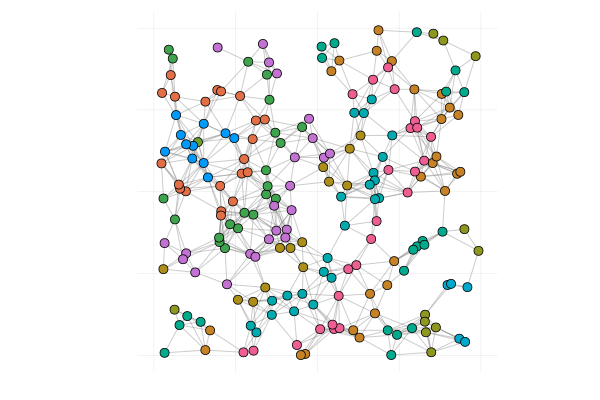

In [7]:
function grafo_geometrico_plots(num_nodos = 200, radio = 0.125)
    # Generar puntos aleatorios en un cuadrado unitario
    posiciones = rand(2, num_nodos)

    # Crear el grafo
    grafo = SimpleGraph(num_nodos)
    for i in 1:num_nodos, j in (i+1):num_nodos
        if norm(posiciones[:, i] - posiciones[:, j]) <= radio
            add_edge!(grafo, i, j)
        end
    end

    # Encontrar el nodo central
    centro = [0.5, 0.5]
    # Repetir centro para que tenga las mismas dimensiones que cada columna de posiciones
    centro_repetido = repeat(centro, 1, num_nodos) 
    distancias_al_centro = norm.(posiciones .- centro_repetido)
    ncenter = argmin(distancias_al_centro)

    # Convertir ncenter a entero
    ncenter_int = Tuple(ncenter)[1]

    # Calcular las distancias desde el nodo central
    distancias = gdistances(grafo, ncenter_int)

    # Visualizar el grafo
    plt = plot(
        layout = (1, 1),
        legend = false,
        axis = false,
        xlims = (-0.05, 1.05),
        ylims = (-0.05, 1.05),
        aspect_ratio = 1,
    )

    for edge in edges(grafo)
        # Usar Graphs.src(edge) y Graphs.dst(edge)
        src_node = Graphs.src(edge) 
        dst_node = Graphs.dst(edge) 
        plot!(
            plt,
            [posiciones[1, src_node], posiciones[1, dst_node]],
            [posiciones[2, src_node], posiciones[2, dst_node]],
            color = :gray,
            alpha = 0.4,
        )
    end

    scatter!(
        plt,
        posiciones[1, :],
        posiciones[2, :],
        markersize = 5,
        markercolor = distancias,
        c = :reds,
    )

    return plt
end

# Generar y mostrar el gráfico
grafo_geometrico_plots()